In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.rename(columns={"education.num":"education_num","marital.status":"marital_status",
                  "capital.gain":"capital_gain","capital.loss":"capital_loss","hours.per.week":"hours_per_week","native.country":"native_country"},inplace=True)

In [11]:
cat=df.select_dtypes(include="object").columns
num=df.select_dtypes(exclude="object").columns
print(cat)
print(num)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [12]:
for i in cat:
    print(i,df[i].unique())
    print("*"*60)

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
************************************************************
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
************************************************************
marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
************************************************************
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
************************************************************
relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-re

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [14]:
df.native_country.mode()

0    United-States
Name: native_country, dtype: object

In [15]:
df['workclass']=df['workclass'].replace("?","Private")
df['occupation']=df['occupation'].replace("?","Prof-specialty")
df['native_country']=df['native_country'].replace("?","United-States")

In [16]:
df.shape

(32537, 15)

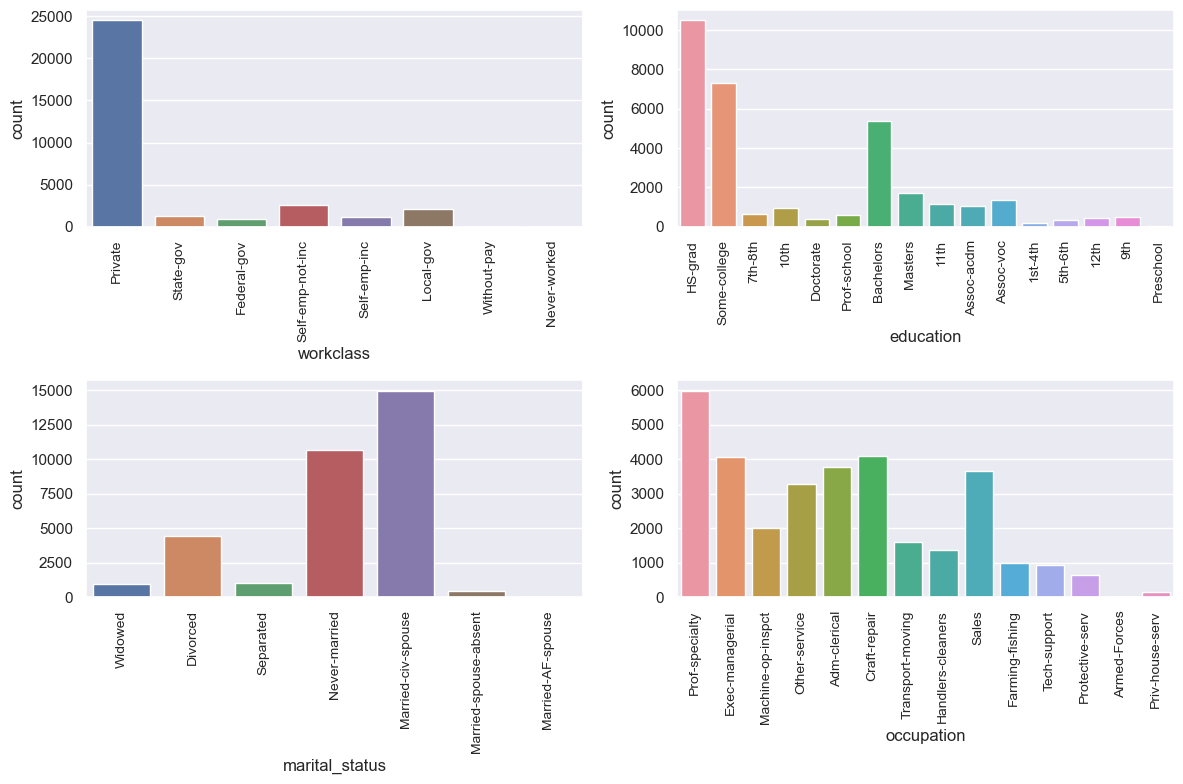

In [17]:
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(12,8)})
columns1=['workclass',"education","marital_status","occupation"]

for i in range(0,len(columns1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[columns1[i]])
    plt.xticks(size=10,rotation=90)
    plt.tight_layout()


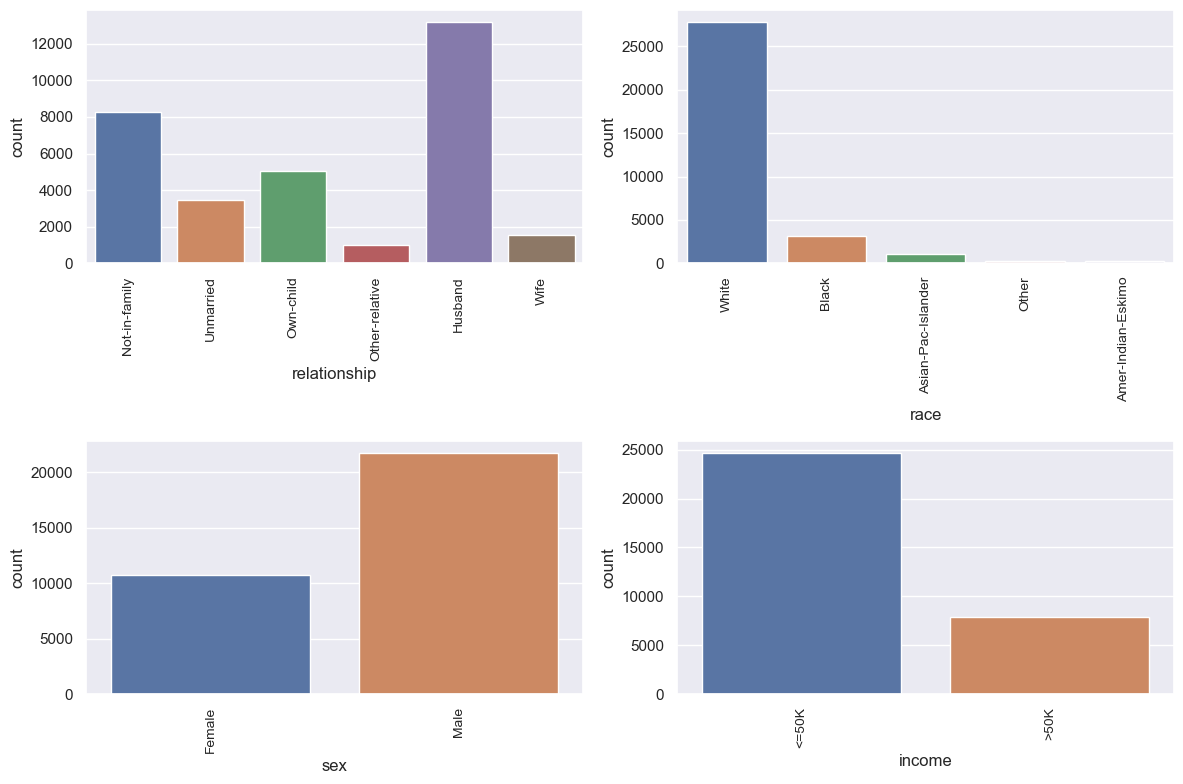

In [18]:
columns2=['relationship',"race","sex","income"]

for i in range(0,len(columns2)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[columns2[i]])
    plt.xticks(size=10,rotation=90)
    plt.tight_layout()


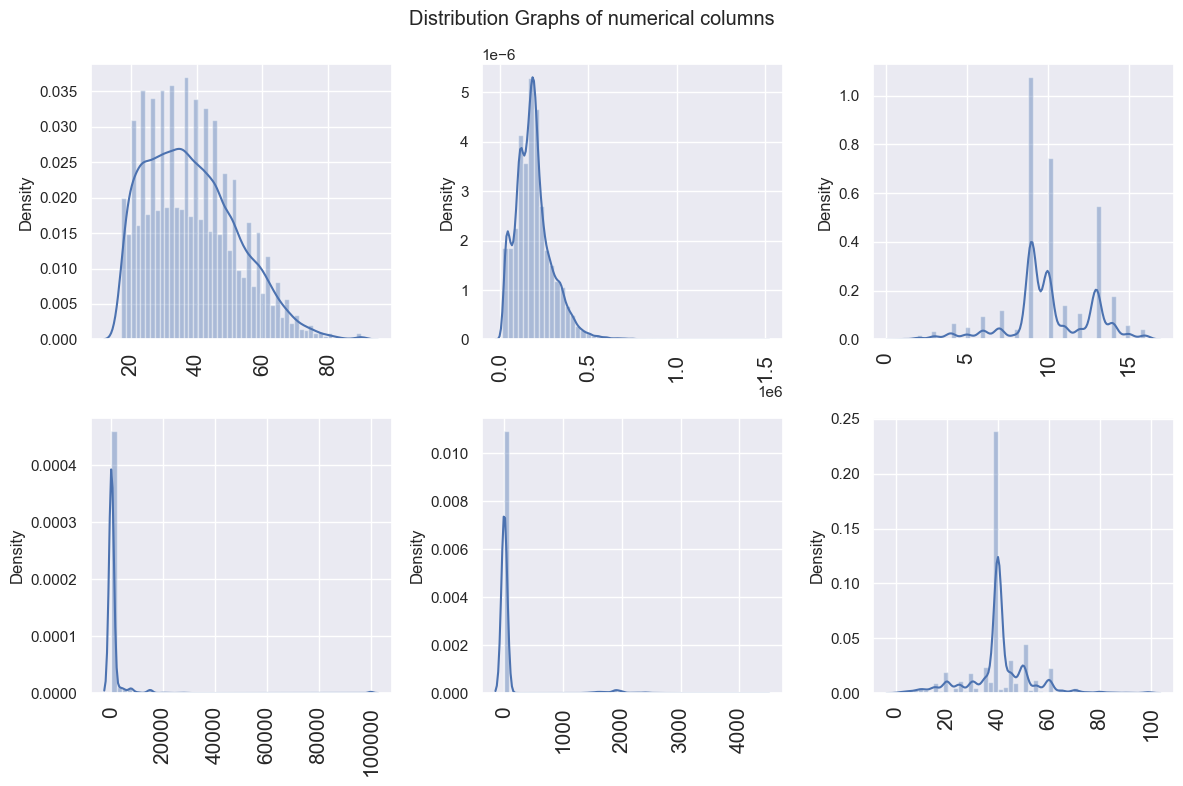

In [19]:
plt.suptitle("Distribution Graphs of numerical columns")
for i in range(0,len(num)):
    plt.subplot(2,3,i+1)
    sns.distplot(x=df[num[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

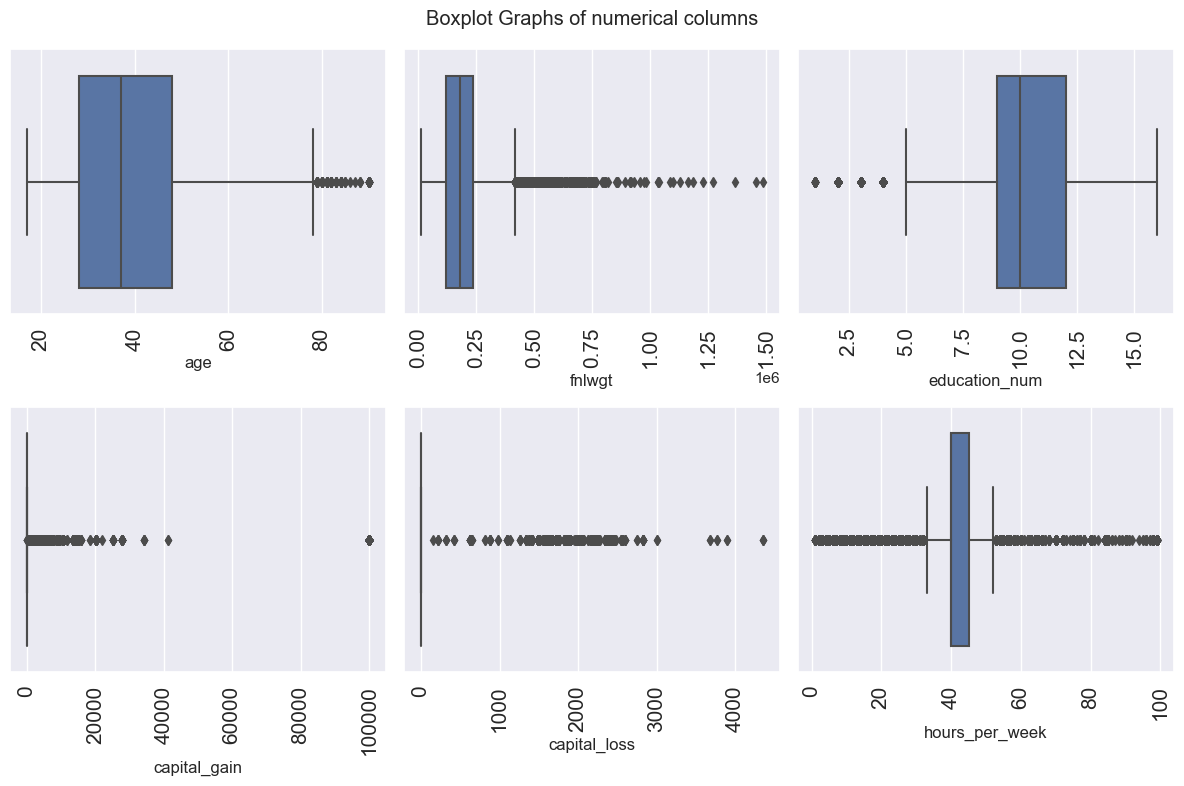

In [20]:
plt.suptitle("Boxplot Graphs of numerical columns")
for i in range(0,len(num)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [21]:
col=['age', 'fnlwgt', 'education_num', 
       'hours_per_week']
for i in num:
    
        
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_limit = df[i].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[i].quantile(0.75) + (IQR * 1.5)

    df[i] = pd.DataFrame(np.where(df[i] > upper_limit,upper_limit, np.where(df[i] < lower_limit,lower_limit, df[i])))
    print(i,df[i].mean())

age 38.559745332636176
fnlwgt 186816.09796081568
education_num 10.125734321655953
capital_gain 0.0
capital_loss 0.0
hours_per_week 41.203087995571


<AxesSubplot:xlabel='income'>

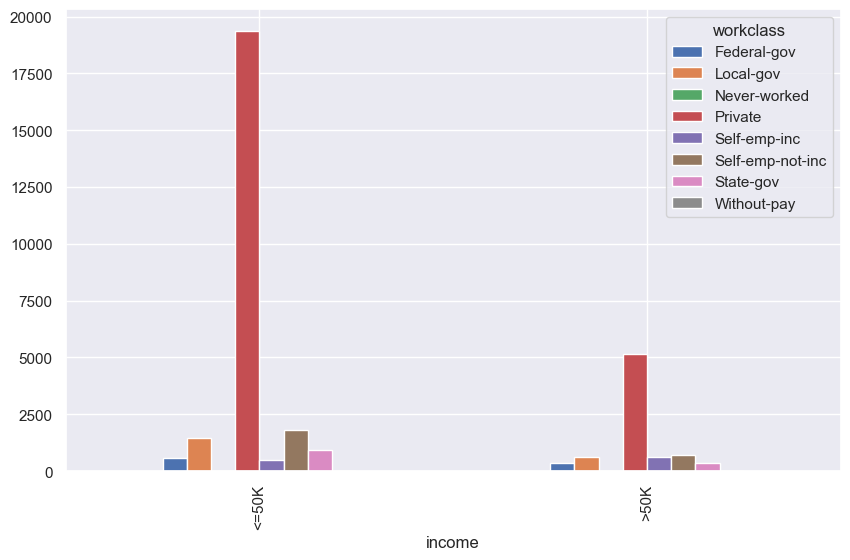

In [22]:
sns.set(rc={"figure.figsize":(10,6)})
salary=pd.crosstab(df['income'],df['workclass'])
salary.plot(kind='bar')

<AxesSubplot:xlabel='income'>

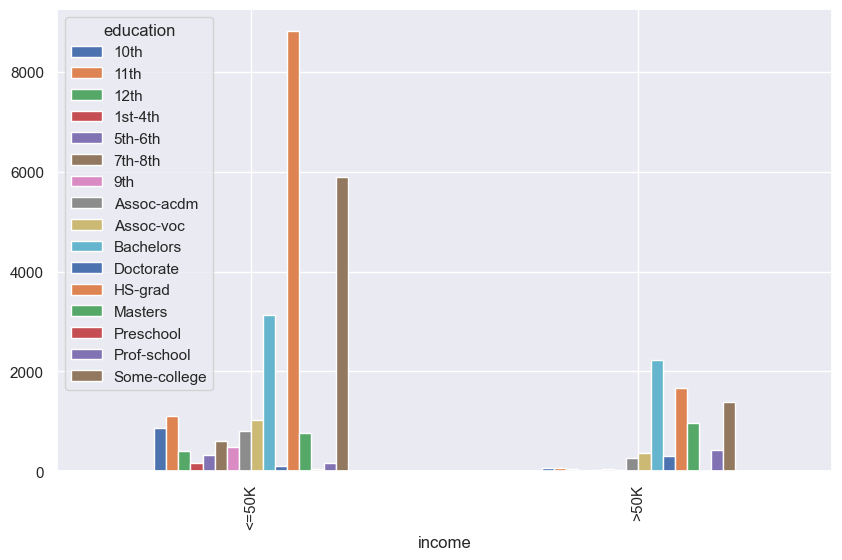

In [23]:
educaation=pd.crosstab(df['income'],df['education'])
educaation.plot(kind='bar')

<AxesSubplot:xlabel='income'>

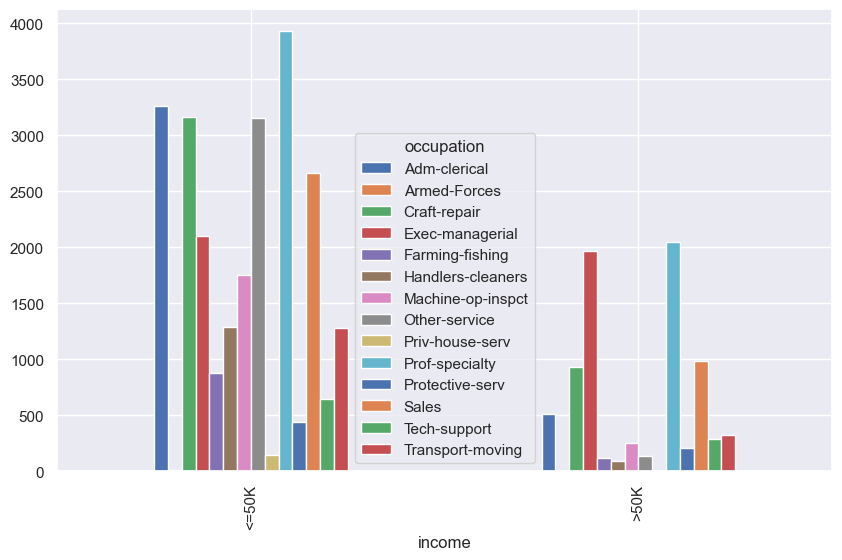

In [24]:
occupation=pd.crosstab(df['income'],df['occupation'])
occupation.plot(kind='bar')

<AxesSubplot:xlabel='income'>

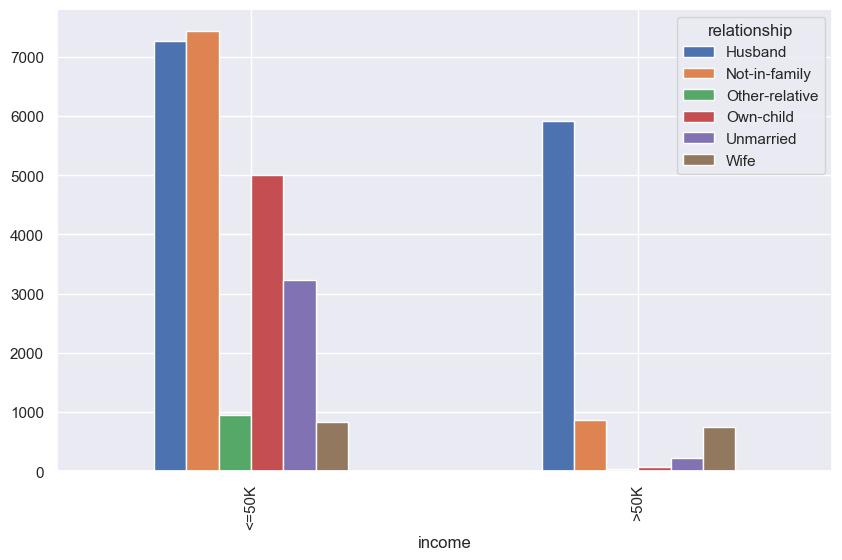

In [25]:
occupation=pd.crosstab(df['income'],df['relationship'])
occupation.plot(kind='bar')

<AxesSubplot:xlabel='income'>

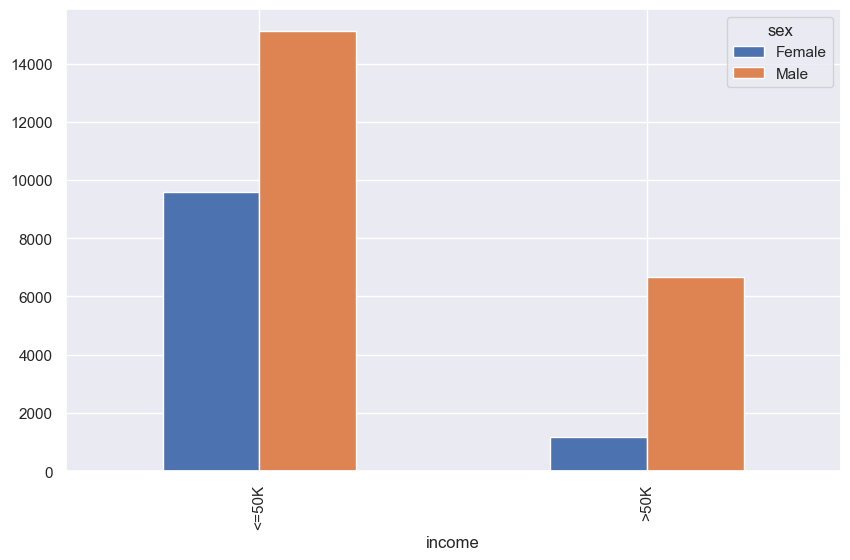

In [26]:
sex=pd.crosstab(df['income'],df['sex'])
sex.plot(kind='bar')

In [27]:
cat

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in cat:
    le.fit(df[i])
    df[i]=le.transform(df[i])

In [29]:
df['income']=df['income'].replace({"<=50K":0,">50K":1})
df.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [30]:
df.isnull().sum()

age               24
workclass          0
fnlwgt            24
education          0
education_num     24
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain      24
capital_loss      24
hours_per_week    24
native_country     0
income             0
dtype: int64

In [31]:
cond1=df[df['income']==0].sample(7834,replace=False)
cond2=df[df['income']==1].sample(7834,replace=False)
df=pd.concat([cond1,cond2])
df['income'].value_counts()

0    7834
1    7834
Name: income, dtype: int64

In [32]:
df.drop(['education',"fnlwgt"],axis=1,inplace=True)


In [33]:
df.to_csv("cleanedata.csv",index=False)

In [34]:
df.dropna(inplace=True)
df.income.value_counts()

0    7830
1    7829
Name: income, dtype: int64

In [35]:
# Saprate dependent and indipendent features
X = df.drop("income",axis=1)
y = df["income"]

In [36]:
# from imblearn.over_sampling import RandomOverSampler
# ros=RandomOverSampler()
# X_ros,y_ros=ros.fit_resample(X,y)
# print(y.value_counts())
# print(y_ros.value_counts())

In [37]:
# X=X_ros
# y=y_ros
# y.value_counts()

In [38]:
df1=df.copy()
df1.shape

(15659, 13)

In [39]:
y.value_counts()

0    7830
1    7829
Name: income, dtype: int64

<AxesSubplot:>

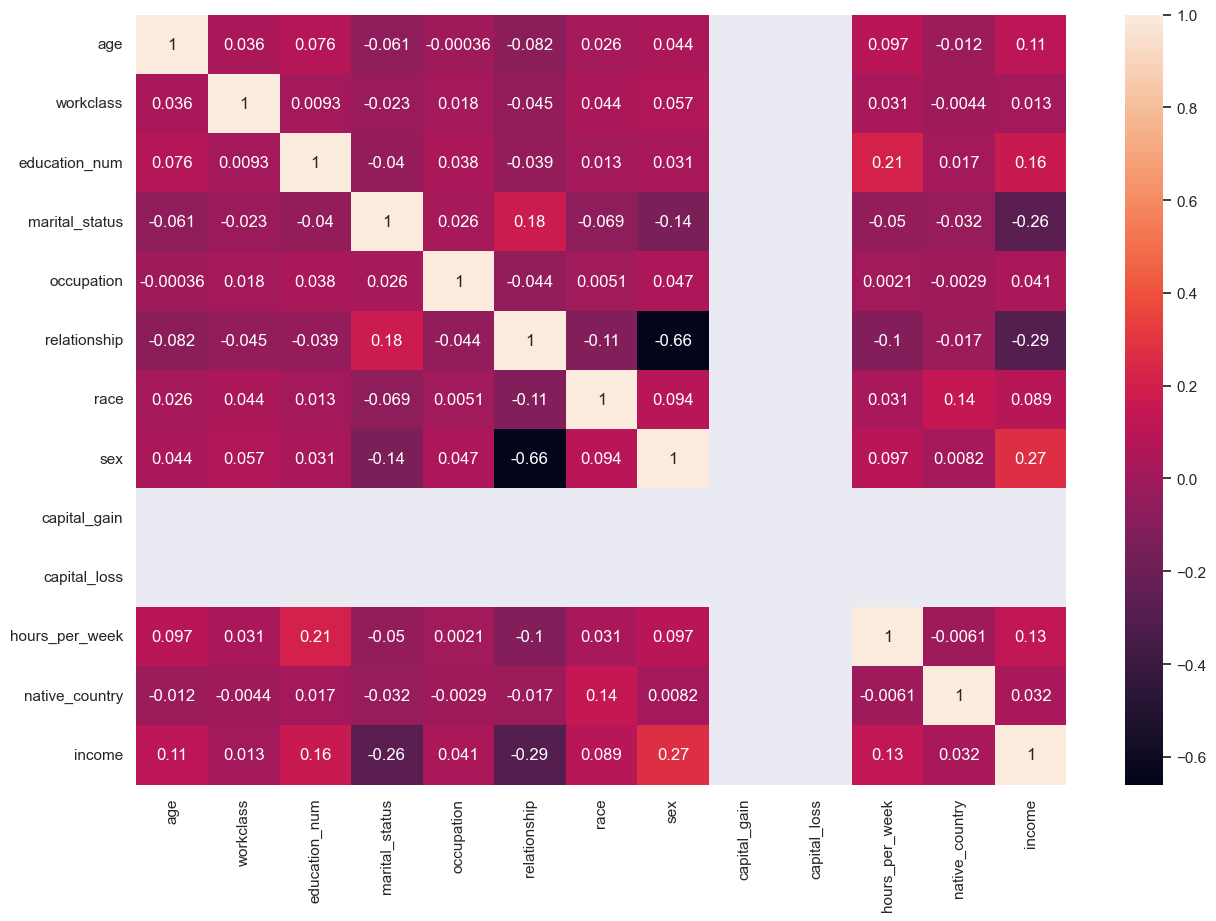

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
254,52.0,1,9.0,2,2,0,4,1,0.0,0.0,40.0,38,0
24453,20.0,6,9.0,2,9,0,4,1,0.0,0.0,32.5,38,0
3616,52.0,3,9.0,0,2,1,4,1,0.0,0.0,40.0,38,0
27707,35.0,1,7.0,0,10,3,1,1,0.0,0.0,32.5,38,0
24887,50.0,3,10.0,5,11,4,2,0,0.0,0.0,40.0,38,0


In [42]:
X.isnull().sum()



age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [43]:
X.shape

(15659, 12)

In [44]:
catigorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country'],
      dtype='object')


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [102]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler()),
        
    ],verbose=True

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [75]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12527, 12)
(3132, 12)
(12527,)
(3132,)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [77]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore
    
    

## USE HYPERPARAMETER

In [78]:
lr = LogisticRegression()

In [79]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [80]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)


In [81]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [82]:
grid.best_params_


{'C': 0.001,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [83]:
grid.score(X_train,y_train)


0.7038397062345334

In [84]:
y_pred = grid.predict(X_test)
accuracy_score(y_test,y_pred)


0.6982758620689655

In [85]:
dr = DecisionTreeClassifier()
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [86]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [87]:
grid_search.fit(X_train,y_train)
grid_search.best_params_


{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'best'}

In [88]:
grid_search.score(X_train,y_train)


0.767861419334238

In [89]:
y_pred1= grid_search.predict(X_test)
accuracy_score(y_test,y_pred1)


0.7614942528735632

In [90]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1566
           1       0.66      0.81      0.73      1566

    accuracy                           0.70      3132
   macro avg       0.71      0.70      0.69      3132
weighted avg       0.71      0.70      0.69      3132



In [91]:
rf = RandomForestClassifier()
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [92]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,scoring="accuracy")

In [93]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [94]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 5,
 'n_estimators': 30}

In [95]:
grid_search.score(X_train,y_train)


0.8046619302307016

In [96]:
y_pred2 = grid_search.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7752234993614304

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1566
           1       0.66      0.81      0.73      1566

    accuracy                           0.70      3132
   macro avg       0.71      0.70      0.69      3132
weighted avg       0.71      0.70      0.69      3132



In [98]:
sv=svm.SVC()
sv.fit(X_train,y_train)

SVC()

In [99]:
y_pred3=sv.predict(X_test)
accuracy_score(y_test,y_pred3)

0.6912515964240102

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [73]:
# Hyperparameter grids for each algorithm
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
    },
    "Naive Bayes": {},
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# List of classifier models
classifiers = [
    ("Logistic Regression", LogisticRegression(), param_grids["Logistic Regression"]),
    ("Naive Bayes", GaussianNB(), param_grids["Naive Bayes"]),
    ("Decision Tree", DecisionTreeClassifier(), param_grids["Decision Tree"]),
    ("Random Forest", RandomForestClassifier(), param_grids["Random Forest"]),
    ("Support Vector Machine", SVC(), param_grids["Support Vector Machine"]),
    ("K-Nearest Neighbors", KNeighborsClassifier(), param_grids["K-Nearest Neighbors"])
]

# Loop through classifiers
for name, classifier, param_grid in classifiers:
    print(f"Tuning hyperparameters for {name}...")
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    
    # Fit the GridSearchCV to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
#     if name == "Support Vector Machine":
#         model_filename = 'kidney_model.pkl'
#         joblib.dump(best_model, model_filename)
    
    # Predict using the best model
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best Hyperparameters for {name}:", best_params)
    print(f"Accuracy for {name}:", accuracy)
    print("-" * 40)
    
    print(f"Classification Report for {name}:")
    report = classification_report(y_test, y_pred)
    print(report)
    print("-" * 60)


Tuning hyperparameters for Logistic Regression...
Best Hyperparameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Accuracy for Logistic Regression: 0.6947637292464879
----------------------------------------
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1566
           1       0.67      0.78      0.72      1566

    accuracy                           0.69      3132
   macro avg       0.70      0.69      0.69      3132
weighted avg       0.70      0.69      0.69      3132

------------------------------------------------------------
Tuning hyperparameters for Naive Bayes...
Best Hyperparameters for Naive Bayes: {}
Accuracy for Naive Bayes: 0.7305236270753512
----------------------------------------
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      1566
           1       0.72      

KeyboardInterrupt: 